f(1.361) = 4.696341103860938
f(1.394) = 5.599336511874705


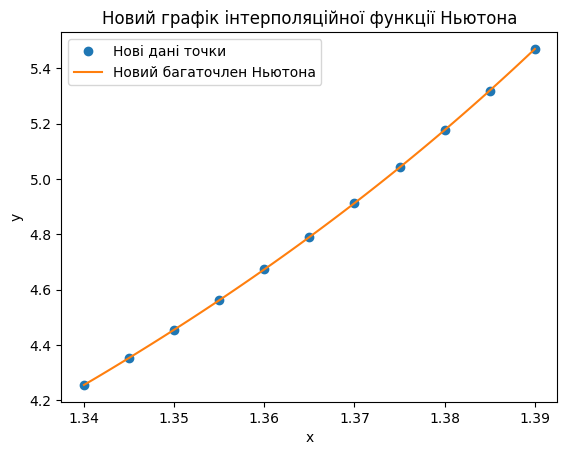

In [2]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Задаємо нові точки
new_x = np.array([1.340 + i * 0.005 for i in range(0, 11)])
new_y = np.array([4.2556, 4.3532, 4.4552, 4.5618, 4.6734, 4.7903, 4.9130, 5.0419, 5.1774, 5.3201, 5.4706])

# Перша інтерполяційна формула
def first_interpolation_new(new_x, new_y, x0):
    n = len(new_x)
    f = np.zeros((n, n))
    f[:, 0] = new_y

    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (new_x[i+j] - new_x[i])

    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - new_x[i])
        ans += prod

    return ans

# Друга інтерполяційна формула
def second_interpolation_new(new_x, new_y, x0):
    n = len(new_x)
    f = np.zeros((n, n))
    f[:, 0] = new_y

    for j in range(1, n):
        for i in range(n - j):
          f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (new_x[i+j] - new_x[i])

    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - new_x[i])
        ans += prod

    return ans

# Обчислюємо значення функції в нових точках new_x1 = 3.522 та new_x2 = 3.905
new_x1 = 1.361
new_x2 = 1.394
new_y1 = first_interpolation_new(new_x, new_y, new_x1)
new_y2 = second_interpolation_new(new_x, new_y, new_x2)

print(f"f({new_x1}) = {new_y1}")
print(f"f({new_x2}) = {new_y2}")

# Графік інтерполяційної функції
new_xx = np.linspace(np.min(new_x), np.max(new_x), 100)
new_yy = np.zeros_like(new_xx)
for i in range(len(new_xx)):
    new_yy[i] = second_interpolation_new(new_x, new_y, new_xx[i])
plt.plot(new_x, new_y, 'o', label='Нові дані точки')
plt.plot(new_xx, new_yy, label='Новий багаточлен Ньютона')
plt.title("Новий графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
